# Exploratory Data Analysis - Zomato

**Overview:**

The Zomato EDA project involves analyzing a dataset containing information about various restaurants listed on Zomato. The goal is to derive insights regarding restaurant distribution, cuisine types, pricing, customer ratings, and geographical factors. Key steps include data cleaning, handling missing values, and visualizing trends. The analysis provides insights into popular cuisines, cities with the most restaurants, correlations between ratings and price, and the impact of location on restaurant success. The project helps in understanding customer preferences and factors influencing restaurant performance.

**Objectives**
  
The analysis that we are going to perform shall answer the following questions:

+ What type of restaurant do the majority of customers order from?
+ How many votes has each type of restaurant received from customers?
+ What are the ratings that the majority of restaurants have received?
+ Zomato has observed that most couples order most of their food online. what is their average spending on each order?
+ Which mode (online or offline) has received the maximum ratings?
+ what type of restaurant received more offline orders, so that Zomato can provide customers with some good offers?

## Step 1 : Importing Libraries

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Step 2 : Create the data frame

In [19]:
dataframe = pd.read_csv("Zomato data .csv")

In [21]:
dataframe

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1/5,775,800,Buffet
1,Spice Elephant,Yes,No,4.1/5,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8/5,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,300,Buffet
4,Grand Village,No,No,3.8/5,166,600,Buffet
...,...,...,...,...,...,...,...
143,Melting Melodies,No,No,3.3/5,0,100,Dining
144,New Indraprasta,No,No,3.3/5,0,150,Dining
145,Anna Kuteera,Yes,No,4.0/5,771,450,Dining
146,Darbar,No,No,3.0/5,98,800,Dining


### Covert the data type of column - rate

In [25]:
def handleRate(value):
    value=str(value).split('/')
    value=value[0];
    return float(value)

dataframe['rate']=dataframe['rate'].apply(handleRate)
print(dataframe.head())

                    name online_order book_table  rate  votes  \
0                  Jalsa          Yes        Yes   4.1    775   
1         Spice Elephant          Yes         No   4.1    787   
2        San Churro Cafe          Yes         No   3.8    918   
3  Addhuri Udupi Bhojana           No         No   3.7     88   
4          Grand Village           No         No   3.8    166   

   approx_cost(for two people) listed_in(type)  
0                          800          Buffet  
1                          800          Buffet  
2                          800          Buffet  
3                          300          Buffet  
4                          600          Buffet  


In [27]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   name                         148 non-null    object 
 1   online_order                 148 non-null    object 
 2   book_table                   148 non-null    object 
 3   rate                         148 non-null    float64
 4   votes                        148 non-null    int64  
 5   approx_cost(for two people)  148 non-null    int64  
 6   listed_in(type)              148 non-null    object 
dtypes: float64(1), int64(2), object(4)
memory usage: 8.2+ KB


## Type of Resturant

In [30]:
dataframe.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet


Text(0.5, 0, 'type of resturant')

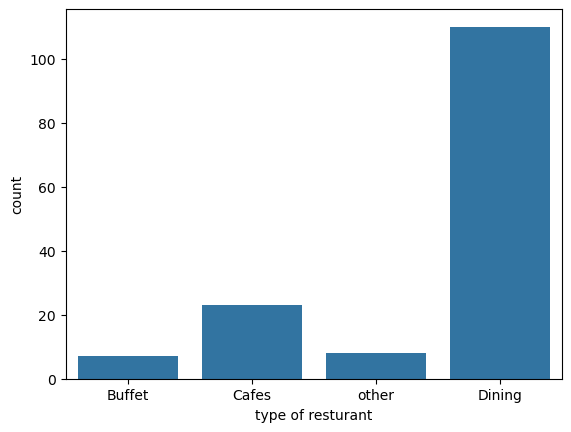

In [34]:
sns.countplot(x=dataframe['listed_in(type)'])
plt.xlabel("type of resturant")

Text(0, 0.5, 'votes')

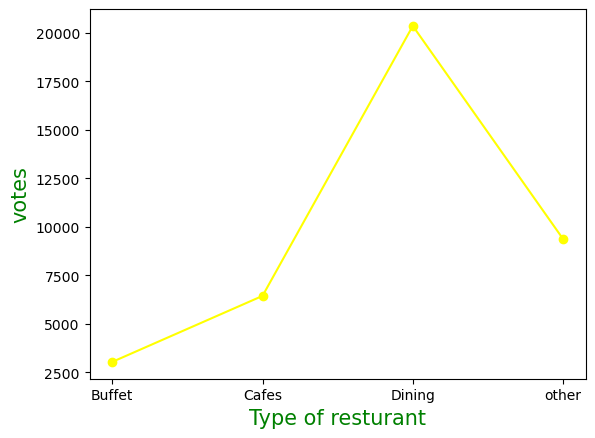

In [44]:
grouped_data = dataframe.groupby('listed_in(type)')['votes'].sum()
result = pd.DataFrame({'votes': grouped_data})
plt.plot(result, c="yellow", marker="o")
plt.xlabel("Type of resturant", c="green", size=15)
plt.ylabel("votes", c="green", size=15)

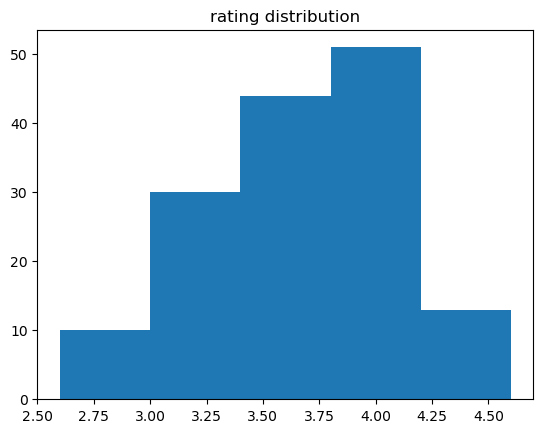

In [52]:
plt.hist(dataframe['rate'],bins=5)
plt.title("rating distribution")
plt.show()

<Axes: xlabel='approx_cost(for two people)', ylabel='count'>

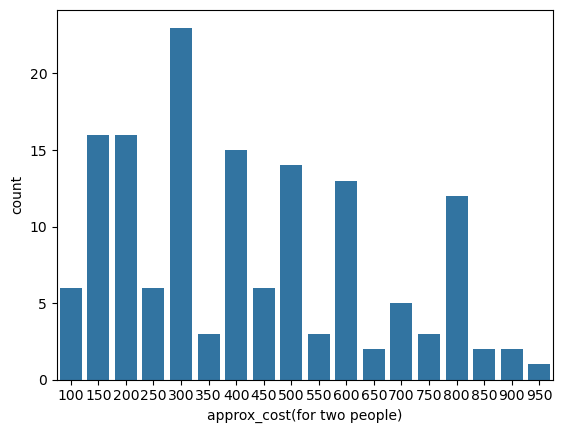

In [56]:
couple_data = dataframe['approx_cost(for two people)']
sns.countplot(x=couple_data)

<Axes: xlabel='online_order', ylabel='rate'>

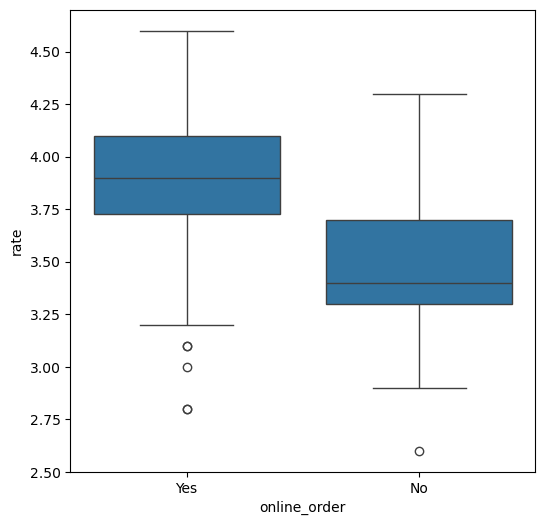

In [58]:
plt.figure(figsize = (6,6))
sns.boxplot(x='online_order', y='rate', data=dataframe)

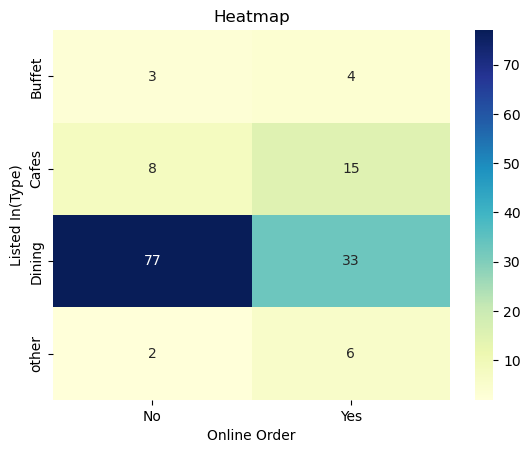

In [70]:
pivot_table = dataframe.pivot_table(index='listed_in(type)', columns='online_order', aggfunc='size', fill_value=0)
sns.heatmap(pivot_table, annot=True, cmap="YlGnBu", fmt='d')
plt.title("Heatmap")
plt.xlabel("Online Order")
plt.ylabel("Listed In(Type)")
plt.show()